### Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


#### Dataset

In this homework, we will use the Students Performance in 2024 JAMB dataset from [Kaggle](https://www.kaggle.com/datasets/idowuadamo/students-performance-in-2024-jamb).

Here's a wget-able [link](https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv):

```bash
wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
```

The goal of this homework is to create a regression model for predicting the performance of students on a standardized test (column `'JAMB_Score'`).


### Preparing the dataset 

First, let's make the names lowercase:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

Preparation:

* Remove the `student_id` column.
* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.


In [11]:
# !wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.model_selection import train_test_split


In [12]:
df = pd.read_csv('jamb_exam_results.csv')
df.columns = df.columns.str.lower().str.replace(' ', '_')
# df.info()

# Remove the student_id column as it's not needed for prediction
df = df.drop('student_id', axis=1)
# Fill missing values with zeros
df = df.fillna(0)

df.info()
# 將資料分成訓練、驗證和測試集
# 首先分出測試集 (20%)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# 再從訓練集中分出驗證集 (原始資料的 20%)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# 分離特徵和目標變數
y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

# 移除目標變數列
del df_train['jamb_score']
del df_val['jamb_score'] 
del df_test['jamb_score']

# 使用 DictVectorizer 轉換資料
dv = DictVectorizer(sparse=True)

X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.transform(df_val.to_dict(orient='records'))
X_test = dv.transform(df_test.to_dict(orient='records'))

print('訓練集大小:', X_train.shape)
print('驗證集大小:', X_val.shape)
print('測試集大小:', X_test.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jamb_score                    5000 non-null   int64  
 1   study_hours_per_week          5000 non-null   int64  
 2   attendance_rate               5000 non-null   int64  
 3   teacher_quality               5000 non-null   int64  
 4   distance_to_school            5000 non-null   float64
 5   school_type                   5000 non-null   object 
 6   school_location               5000 non-null   object 
 7   extra_tutorials               5000 non-null   object 
 8   access_to_learning_materials  5000 non-null   object 
 9   parent_involvement            5000 non-null   object 
 10  it_knowledge                  5000 non-null   object 
 11  age                           5000 non-null   int64  
 12  gender                        5000 non-null   object 
 13  soc

In [13]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
jamb_score,5000.0,174.07460,47.616477,100.0,135.0,170.0,209.0,367.0
study_hours_per_week,5000.0,19.52120,9.634569,0.0,13.0,19.0,26.0,40.0
attendance_rate,5000.0,84.23520,9.485688,50.0,78.0,84.0,91.0,100.0
teacher_quality,5000.0,2.52140,0.985564,1.0,2.0,2.0,3.0,5.0
distance_to_school,5000.0,10.00546,4.820221,0.0,6.6,10.0,13.4,20.0
age,5000.0,18.44580,2.301504,15.0,16.0,18.0,20.0,22.0
assignments_completed,5000.0,1.80460,0.992076,1.0,1.0,1.0,2.0,5.0




#### Question 1

Let's train a decision tree regressor to predict the `jamb_score` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `study_hours_per_week` (0)
* `attendance_rate`
* `teacher_quality`
* `distance_to_school`



In [14]:
# 導入決策樹迴歸器
from sklearn.tree import DecisionTreeRegressor

# 建立並訓練決策樹模型，設定最大深度為1
dt = DecisionTreeRegressor(max_depth=1, random_state=1)
dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=1, random_state=1)

In [25]:
# df.info() #dtypes: float64(1), int64(6), object(9)
# dv.feature_names_
# dv.feature_names_

['access_to_learning_materials=No',
 'access_to_learning_materials=Yes',
 'age',
 'assignments_completed',
 'attendance_rate',
 'distance_to_school',
 'extra_tutorials=No',
 'extra_tutorials=Yes',
 'gender=Female',
 'gender=Male',
 'it_knowledge=High',
 'it_knowledge=Low',
 'it_knowledge=Medium',
 'parent_education_level',
 'parent_education_level=Primary',
 'parent_education_level=Secondary',
 'parent_education_level=Tertiary',
 'parent_involvement=High',
 'parent_involvement=Low',
 'parent_involvement=Medium',
 'school_location=Rural',
 'school_location=Urban',
 'school_type=Private',
 'school_type=Public',
 'socioeconomic_status=High',
 'socioeconomic_status=Low',
 'socioeconomic_status=Medium',
 'study_hours_per_week',
 'teacher_quality']

In [15]:
len(dv.feature_names_)
dt.tree_.feature[0]
dv.feature_names_[27]
dt.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [16]:

# 取得特徵重要性
feature_importance = pd.DataFrame({
    'feature': dv.feature_names_,
    'importance': dt.feature_importances_
})

# 顯示特徵重要性，按重要性排序
print("特徵重要性:")
print(feature_importance.sort_values('importance', ascending=False))

# 預測並計算RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred = dt.predict(X_val)
rmse = sqrt(mean_squared_error(y_val, y_pred))
print(f'\n驗證集RMSE: {rmse:.2f}')


特徵重要性:
                             feature  importance
27              study_hours_per_week         1.0
0    access_to_learning_materials=No         0.0
15  parent_education_level=Secondary         0.0
26       socioeconomic_status=Medium         0.0
25          socioeconomic_status=Low         0.0
24         socioeconomic_status=High         0.0
23                school_type=Public         0.0
22               school_type=Private         0.0
21             school_location=Urban         0.0
20             school_location=Rural         0.0
19         parent_involvement=Medium         0.0
18            parent_involvement=Low         0.0
17           parent_involvement=High         0.0
16   parent_education_level=Tertiary         0.0
14    parent_education_level=Primary         0.0
1   access_to_learning_materials=Yes         0.0
13            parent_education_level         0.0
12               it_knowledge=Medium         0.0
11                  it_knowledge=Low         0.0
10           


#### Question 2

Train a random forest regressor with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on the validation data?

* 22.13
* 42.13 (0)
* 62.13
* 82.12


In [17]:
# 導入隨機森林迴歸器
from sklearn.ensemble import RandomForestRegressor

# 建立並訓練隨機森林模型
rf = RandomForestRegressor(
    n_estimators=10,  # 使用10個決策樹
    random_state=1,   # 設定隨機種子以確保結果可重現
    n_jobs=-1         # 使用所有可用的CPU核心來加速訓練
)

# 訓練模型
rf.fit(X_train, y_train)

# 在驗證集上進行預測並計算RMSE
y_pred = rf.predict(X_val)
rmse = sqrt(mean_squared_error(y_val, y_pred))
print(f'驗證集RMSE: {rmse:.2f}')


驗證集RMSE: 42.14



#### Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80 (0)
- 200


n_estimators=10, RMSE=42.137
n_estimators=20, RMSE=41.461
n_estimators=30, RMSE=41.106
n_estimators=40, RMSE=40.917
n_estimators=50, RMSE=40.852
n_estimators=60, RMSE=40.784
n_estimators=70, RMSE=40.677
n_estimators=80, RMSE=40.539
n_estimators=90, RMSE=40.504
n_estimators=100, RMSE=40.517
n_estimators=110, RMSE=40.593
n_estimators=120, RMSE=40.625
n_estimators=130, RMSE=40.651
n_estimators=140, RMSE=40.595
n_estimators=150, RMSE=40.597
n_estimators=160, RMSE=40.604
n_estimators=170, RMSE=40.628
n_estimators=180, RMSE=40.641
n_estimators=190, RMSE=40.631
n_estimators=200, RMSE=40.601


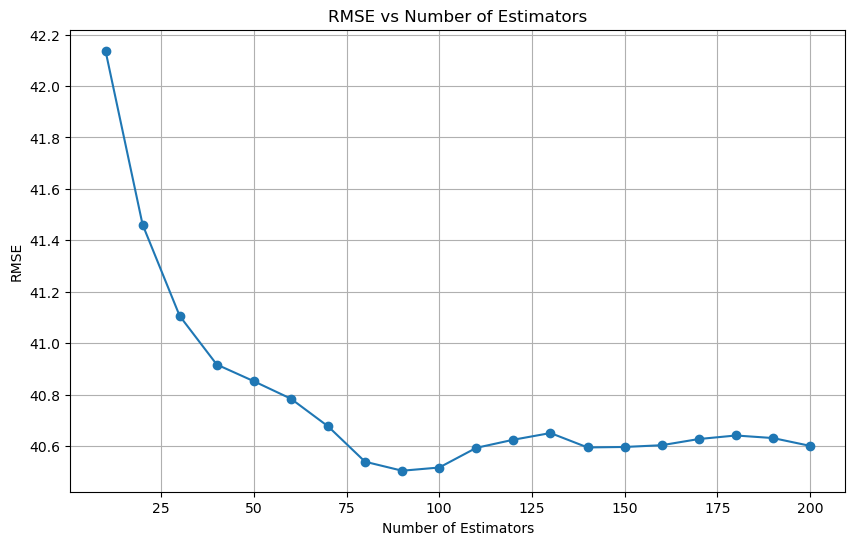


最佳n_estimators值: 90
對應的最佳RMSE: 40.504


In [18]:
# 創建一個列表來存儲不同n_estimators值的RMSE
n_estimators_values = range(10, 201, 10)  # 從10到200，步長為10
rmse_scores = []

# 對每個n_estimators值訓練模型並計算RMSE
for n_est in n_estimators_values:
    # 建立隨機森林模型
    rf = RandomForestRegressor(
        n_estimators=n_est,    # 使用當前迭代的n_estimators值
        random_state=1,        # 固定隨機種子
        n_jobs=-1             # 使用所有CPU核心
    )
    
    # 訓練模型
    rf.fit(X_train, y_train)
    
    # 在驗證集上進行預測
    y_pred = rf.predict(X_val)
    
    # 計算RMSE並添加到列表中
    rmse = sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores.append(rmse)
    print(f'n_estimators={n_est}, RMSE={rmse:.3f}')

# 繪製n_estimators vs RMSE的圖表
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, rmse_scores, marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Estimators')
plt.grid(True)
plt.show()

# 找出最佳的n_estimators值
best_n_estimators = n_estimators_values[np.argmin(rmse_scores)]
best_rmse = min(rmse_scores)
print(f'\n最佳n_estimators值: {best_n_estimators}')
print(f'對應的最佳RMSE: {best_rmse:.3f}')




#### Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10 (0)
* 15
* 20
* 25


max_depth=10, 平均RMSE=40.392
max_depth=15, 平均RMSE=40.735
max_depth=20, 平均RMSE=40.740
max_depth=25, 平均RMSE=40.788

最佳max_depth值: 10
對應的平均RMSE: 40.392


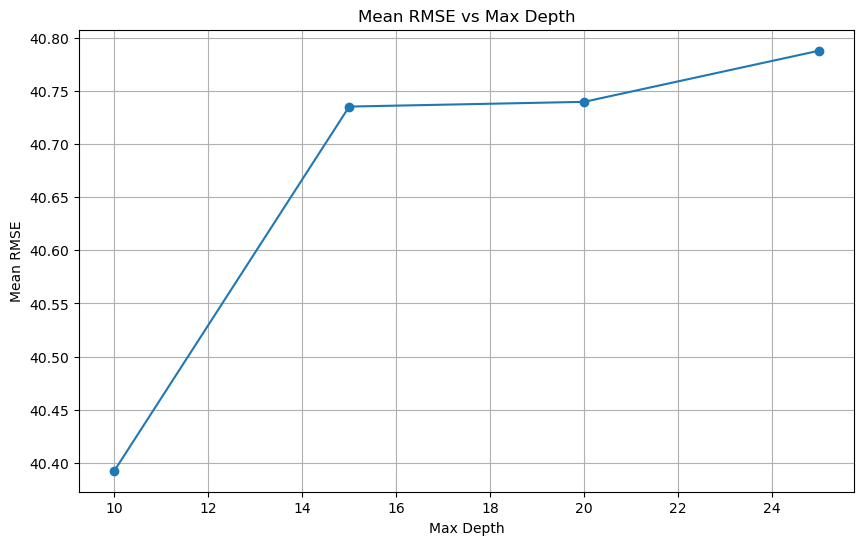

In [19]:
# 初始化儲存結果的字典
depth_results = {}

# 設定要測試的max_depth值
max_depth_values = [10, 15, 20, 25]
n_estimators_values = range(10, 201, 10)

# 對每個max_depth值進行測試
for depth in max_depth_values:
    rmse_scores = []
    
    # 對每個n_estimators值進行測試
    for n_est in n_estimators_values:
        # 建立並訓練隨機森林模型
        rf = RandomForestRegressor(
            n_estimators=n_est,
            max_depth=depth,
            random_state=1,
            n_jobs=-1
        )
        rf.fit(X_train, y_train)
        
        # 在驗證集上進行預測
        y_pred = rf.predict(X_val)
        
        # 計算RMSE
        rmse = sqrt(mean_squared_error(y_val, y_pred))
        rmse_scores.append(rmse)
    
    # 計算平均RMSE並儲存結果
    depth_results[depth] = np.mean(rmse_scores)
    print(f'max_depth={depth}, 平均RMSE={depth_results[depth]:.3f}')

# 找出最佳的max_depth值
best_depth = min(depth_results.items(), key=lambda x: x[1])
print(f'\n最佳max_depth值: {best_depth[0]}')
print(f'對應的平均RMSE: {best_depth[1]:.3f}')

# 繪製結果圖表
plt.figure(figsize=(10, 6))
depths = list(depth_results.keys())
rmses = list(depth_results.values())
plt.plot(depths, rmses, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Mean RMSE')
plt.title('Mean RMSE vs Max Depth')
plt.grid(True)
plt.show()


#### Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `study_hours_per_week`
* `attendance_rate`
* `distance_to_school`
* `teacher_quality`



In [23]:
# 導入必要的模組
from sklearn.ensemble import RandomForestRegressor

# 建立隨機森林模型，設定指定的參數
# n_estimators: 決定森林中樹的數量
# max_depth: 決定每棵樹的最大深度
# random_state: 確保結果可重現
# n_jobs: 使用所有可用的CPU核心來加速訓練
rf_model = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1
)

# 使用訓練資料來訓練模型
rf_model.fit(X_train, y_train)

# 獲取特徵重要性分數
importances = rf_model.feature_importances_


In [27]:

# 建立一個DataFrame來顯示每個特徵及其重要性分數
feature_importance = pd.DataFrame({
    'feature': dv.feature_names_,
    'importance': importances
})

# 根據重要性分數降序排列
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("特徵重要性排序:")
print(feature_importance)

# 找出最重要的特徵
most_important = feature_importance.iloc[0]['feature']
print(f"\n最重要的特徵是: {most_important}")


特徵重要性排序:
                             feature  importance
27              study_hours_per_week    0.248354
4                    attendance_rate    0.149729
5                 distance_to_school    0.136486
28                   teacher_quality    0.082682
2                                age    0.069311
3              assignments_completed    0.031517
24         socioeconomic_status=High    0.025714
17           parent_involvement=High    0.022919
10                 it_knowledge=High    0.017719
15  parent_education_level=Secondary    0.016957
14    parent_education_level=Primary    0.015450
16   parent_education_level=Tertiary    0.014489
6                 extra_tutorials=No    0.013459
18            parent_involvement=Low    0.013358
11                  it_knowledge=Low    0.012404
0    access_to_learning_materials=No    0.012325
19         parent_involvement=Medium    0.011492
25          socioeconomic_status=Low    0.010708
26       socioeconomic_status=Medium    0.010563
9          

In [28]:
# !pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 165.2 kB/s eta 0:12:37
   ---------------------------------------- 0.0/124.9 MB 220.2 kB/s eta 0:09:28
   ---------------------------------------- 0.1/124.9 MB 328.2 kB/s eta 0:06:21
   ---------------------------------------- 0.2/124.9 MB 756.6 kB/s eta 0:02:45
   ---------------------------------------- 0.4/124.9 MB 1.7 MB/s eta 0:01:13
   ---------------------------------------- 0.8/124.9 MB 2.6 MB/s eta 0:00:49
    --------------------------------------- 1.6/124.9 MB 4.6 MB/s eta 0:00:27
    --------------------------------------- 1.8/124.9 MB 5.1 MB/s eta 0:00:25
    --------------------------------------- 2.9/124.9 MB 6.5 MB/s eta 0:00:19
   - -------------------------------------- 3.8/124.9 MB 7.8 MB/s eta 0:00:16
   - -------------------------------------- 4.8/124.9 MB 9.2 MB/s eta 


#### Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3 
* 0.1 (0)
* Both give equal value


In [29]:
import xgboost as xgb
features = dv.get_feature_names_out().tolist()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watchlist=[0.3,0.1]
for eta in watchlist:
    xgb_params = {
        'eta': eta, 
        'max_depth': 6,
        'min_child_weight': 1,
        
        'objective': 'reg:squarederror',
        'nthread': 8,
        
        'seed': 1,
        'verbosity': 1,
    }
    xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=100)
    # type(features),features
    y_pred = xgb_model.predict(dval)
    # roc_auc_score(y_val, y_pred)
    rmse = sqrt(mean_squared_error(y_val, y_pred))
    print(f'驗證集RMSE eta={eta}: {rmse:.2f}')


驗證集RMSE eta=0.3: 43.42
驗證集RMSE eta=0.1: 41.05
